# Spam Project for PEC

Import the Libraries needed

In [797]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

Read Raw Data

In [798]:
#spam dataset
spam=pd.read_excel('spamdata.xlsx')

In [799]:
reg= pd.read_csv(r'C:/Users/sholng/Downloads/enquiry_20180101-20181201.csv')
reg.columns=['ENQUIRY_COUNT_IN_SAME_REQUEST','ENQUIRY_REQUEST_ID', 'MESSAGE_CENTER_ID', 'MESSAGE_TYPE',
       'ENQUIRY_ITEM_TYPE', 'ENQUIRY_TYPE', 'FAIRSYMBOL', 'FAIRFISCALYEAR',
       'EMS_ORDER_NO', 'COMPANY_ID', 'PRODUCT_ID', 'WTMCID', 'DEVICETYPE',
       'ADSYSID', 'CHANNEL (ER)', 'LAST_CHANNEL (AKAMAI)',
       'LAST_CHANNEL_LABEL (AKAMAI)', 'LAST_PUB_CODE (AKAMAI)',
       'LAST_ISSUE_NUM (AKAMAI)', 'SENDER_EMAIL_ADDR', 'SEND_DATE', 'SPAM_IND',
       'STATUS', 'ENQUIRY_NATURE', 'ENQUIRY_NATURE_DESC', 'MESSAGE', 'SUBJECT']

C:\Users\sholng\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11,15,16,17,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [800]:
len(norm)

8986

In [801]:
reg['MESSAGE']=reg['MESSAGE'].astype(str)

In [802]:
reg_df=reg.sample(10000)

In [874]:
reg.groupby('STATUS').mean()

,ENQUIRY_COUNT_IN_SAME_REQUEST,ENQUIRY_REQUEST_ID,MESSAGE_CENTER_ID,FAIRFISCALYEAR,EMS_ORDER_NO,COMPANY_ID,PRODUCT_ID,ADSYSID,LAST_ISSUE_NUM (AKAMAI)
STATUS,,,,,,,,,
APPROVED,45.326653,4.860647e+06,3.714410e+07,1775.324324,1.098979e+07,284468.356043,2.719206e+06,1.264959e+07,1771.440429
AUTO_APPROVED,8.496039,4.903489e+06,3.734694e+07,1791.772301,1.099024e+07,277632.690557,2.582875e+06,1.270298e+07,1782.805686
AUTO_APPROVED_REJECT,1.000000,4.688707e+06,3.613546e+07,NaN,NaN,1509.000000,3.248716e+06,NaN,NaN
AUTO_REJECTED,37.730159,4.829982e+06,3.709454e+07,NaN,NaN,270591.243386,2.499561e+06,1.270348e+07,NaN
REJECTED,91.980743,4.794021e+06,3.690511e+07,NaN,NaN,348653.433287,2.812079e+06,NaN,NaN


In [804]:
spam

,ENQUIRY_REQUEST_ID,MESSAGE_CENTER_ID,MESSAGE_TYPE,ENQUIRY_ITEM_TYPE,ENQUIRY_TYPE,FAIRSYMBOL,FAIRFISCALYEAR,EMS_ORDER_NO,COMPANY_ID,PRODUCT_ID,...,LAST_ISSUE_NUM (AKAMAI),SENDER_EMAIL_ADDR,SEND_DATE,SPAM_IND,STATUS,ENQUIRY_NATURE,ENQUIRY_NATURE_DESC,MESSAGE,SUBJECT,ENQUIRY_COUNT_IN_SAME_REQUEST
0,3929113,30875922,EN,P,Organic-Organic,NaN,NaN,NaN,261632.0,948484.0,...,NaN,felix@acquaintancehk.com,2017-01-02 08:34:47.360,N,AUTO_APPROVED_REJECT,Self-promotion on products,NaN,"Happy New Year!&nbsp;<br />\r\n新年快樂<br />\r\n<br />\r\nIn this special moment, 36Link present you a special gift! Let&rsquo;s celebrate the New Year with new technologies.<br />\r\n在這值得慶祝的時刻, 36Link為您送上一份特別的禮物。 讓我們用科技及系統慶祝新一年嘅來臨。<br />\r\n&nbsp;<br />\r\n36Link Truck Management System (https://www.36link.net/)&nbsp;is now covered by Technology Voucher Programme! Max fund HKD 200K from HK Gov&rsquo;t.<br />\r\n36Link卡車管理系統現在已經包含在&ldquo;科技券計劃&rdquo;的資助範圍,&nbsp;贵公司可以最多從基金裏拿到20萬港元的創新科技基金。<br />\r\n&nbsp;<br />\r\nIt&rsquo;s the best time to exploit the power of system and unlock the unlimited resources in the network.<br />\r\n就在這最佳的時機利用系統的力量去增加公司的效率及透明度， 從網絡裏找到無限的資源及商機。<br />\r\n&nbsp;<br />\r\nOur 36Link Truck Management System is one of the best in the market. The developed company Acquaintance Enterprises Ltd is the incubated company by Hong Kong Science and Technology Park (HKSTP) and is registered with Hong Kong R&amp;D Centre for logistics and Supply Chain Management enabling Technologies Limited (ISCM).&nbsp; But 36Link is not only a management system but also a platform for your company to look for more business opportunities. In 36Link online marketplace, you will be able to find the shippers who need the trucking services.<br />\r\n36Link的卡車管理系統是現今市場上其中一個最好的物流管理系統。&nbsp;開發公司&nbsp;Acquaintance Enterprise Limited&nbsp;是香港科技園的其中一個培育公司,&nbsp;並已登記註冊于香港物流及供應鏈管理應用技術有限公司（ISCM)。但36Link不僅是一個管理系統，而且將會為您的公司尋找更多的商機。在36Link在線市場，您將能夠找到需要貨運服務的發貨人。<br />\r\n&nbsp;<br />\r\nAnd the product 36Link is also the winner of HKTDC Entrepreneur Day Outstanding Startup Award 2016. The company has keeping close partnership with HKTDC. &nbsp;<br />\r\n36Link也是2016年香港貿發局創業日傑出創業獎的得主。公司與香港貿發局保持緊密合作關係。<br />\r\n<br />\r\nWhat to know more about 36Link? Let&rsquo;s go to&nbsp;https://www.36link.net/&nbsp;or you can refer to the attached company introduction!<br />\r\n想了解更多關於36Link？&nbsp;轉到 https://www.36link.net/ 或者您也可以參考附件公司介紹！",Buyer enquiry from hktdc.com,10
1,3948790,31055318,CEX,E,NaN,NaN,NaN,10864165.0,437054.0,NaN,...,NaN,lisa@ncity.com.tw,2017-01-13 14:08:21.593,N,AUTO_APPROVED_REJECT,Self-promotion on products,NaN,"您好, 我們是參加2017HKFW的台灣廠商京澔公司(攤位號3D-DS140)。目前正在尋找製衣及布料廠商，希望能有機會在展會期間與貴司洽談合作事宜。",成衣合作,1
2,3952016,31078441,EN,P,Similar,NaN,NaN,NaN,431801.0,3118178.0,...,NaN,alonisrael85@gmail.com,2017-01-16 04:14:15.300,Y,AUTO_APPROVED,NaN,NaN,"Please quote me the latest price of the above product.<br><br>Purchase Quantity: 10 piece(s)<br><br>hello,<br />\r\ni need 10 pieces of this item can you ship it to israel?<br />\r\nand do you accept visa?or payapl?<br />\r\nplease contact me with: alonisrael85@gmail.com<br />\r\nhere you can see stores that i working with in israel:<br />\r\nwww.buybystore.com",Buyer enquiry from hktdc.com,1
3,3967149,31235319,CEX,P,Organic-Organic,NaN,NaN,10830800.0,439215.0,2997312.0,...,NaN,janine.masiclat@akari.com.ph,2017-01-28 03:11:55.183,Y,AUTO_APPROVED,NaN,NaN,"A buyer with the below contact info has just registered for our upcoming HKTDC Hong Kong International Lighting Fair (Spring Edition), and is interested in your product as shown. You may want to contact him/her and prepare in advance for more detailed discussion during the fair period.<br /><br />Best Regards,<br />Hong Kong Trade Development Council",Pre-registered Buyer of HKTDC Hong Kong International Lighting Fair (Spring Edition) is interested in your product,4
4,4048505,31682473,EN,P,Similar,NaN,NaN,NaN,414642.0,2814339.0,...,NaN,cortez54@inbox.ru,2017-03-04 15:32:36.907,Y,AUTO_APPROVED

In [805]:
reg_df['spam']=0
spam['spam']=1

In [806]:
df=reg_df.append(spam)

In [807]:
reg_df.SEND_DATE=pd.to_datetime(reg_df.SEND_DATE)

In [808]:
spam.SEND_DATE=pd.to_datetime(reg_df.SEND_DATE)

In [809]:
spam.dtypes

ENQUIRY_REQUEST_ID               int64         
MESSAGE_CENTER_ID                int64         
MESSAGE_TYPE                     object        
ENQUIRY_ITEM_TYPE                object        
ENQUIRY_TYPE                     object        
FAIRSYMBOL                       object        
FAIRFISCALYEAR                   float64       
EMS_ORDER_NO                     float64       
COMPANY_ID                       float64       
PRODUCT_ID                       float64       
WTMCID                           float64       
DEVICETYPE                       object        
ADSYSID                          float64       
CHANNEL (ER)                     object        
LAST_CHANNEL (AKAMAI)            object        
LAST_CHANNEL_LABEL (AKAMAI)      object        
LAST_PUB_CODE (AKAMAI)           object        
LAST_ISSUE_NUM (AKAMAI)          float64       
SENDER_EMAIL_ADDR                object        
SEND_DATE                        datetime64[ns]
SPAM_IND                         object 

In [810]:
reg_df.dtypes

ENQUIRY_COUNT_IN_SAME_REQUEST    int64         
ENQUIRY_REQUEST_ID               int64         
MESSAGE_CENTER_ID                int64         
MESSAGE_TYPE                     object        
ENQUIRY_ITEM_TYPE                object        
ENQUIRY_TYPE                     object        
FAIRSYMBOL                       object        
FAIRFISCALYEAR                   float64       
EMS_ORDER_NO                     float64       
COMPANY_ID                       float64       
PRODUCT_ID                       float64       
WTMCID                           object        
DEVICETYPE                       object        
ADSYSID                          float64       
CHANNEL (ER)                     object        
LAST_CHANNEL (AKAMAI)            object        
LAST_CHANNEL_LABEL (AKAMAI)      object        
LAST_PUB_CODE (AKAMAI)           object        
LAST_ISSUE_NUM (AKAMAI)          float64       
SENDER_EMAIL_ADDR                object        
SEND_DATE                        datetim

In [811]:
#df[((df['MESSAGE'].duplicated()==True))].sort_values('MESSAGE')[['MESSAGE','SEND_DATE','spam']]

In [812]:
df['MESSAGE']=df['MESSAGE'].astype(str)

In [813]:
df['MESSAGE'].iloc[5]

'Please quote me the latest price of the above product.<br><br>Purchase Quantity: 100 piece(s)<br><br>I want to know more about your company and products. Please contact me.'

In [814]:
def lan_detector(s):
        try:
            s.encode(encoding='utf-8').decode('ascii')
            return 'Eng'
        except UnicodeDecodeError:
            return 'Chi'

In [815]:
df['lan']=df['MESSAGE'].apply(lan_detector)

In [816]:
dfc=df[df['lan']=='Chi']
dfe=df[df['lan']=='Eng']

In [817]:
dfe=dfe.reset_index(drop=True)
dfc=dfc.reset_index(drop=True)

In [818]:
dfe.columns

Index(['ADSYSID', 'CHANNEL (ER)', 'COMPANY_ID', 'DEVICETYPE', 'EMS_ORDER_NO',
       'ENQUIRY_COUNT_IN_SAME_REQUEST', 'ENQUIRY_ITEM_TYPE', 'ENQUIRY_NATURE',
       'ENQUIRY_NATURE_DESC', 'ENQUIRY_REQUEST_ID', 'ENQUIRY_TYPE',
       'FAIRFISCALYEAR', 'FAIRSYMBOL', 'LAST_CHANNEL (AKAMAI)',
       'LAST_CHANNEL_LABEL (AKAMAI)', 'LAST_ISSUE_NUM (AKAMAI)',
       'LAST_PUB_CODE (AKAMAI)', 'MESSAGE', 'MESSAGE_CENTER_ID',
       'MESSAGE_TYPE', 'PRODUCT_ID', 'SENDER_EMAIL_ADDR', 'SEND_DATE',
       'SPAM_IND', 'STATUS', 'SUBJECT', 'WTMCID', 'spam', 'lan'],
      dtype='object')

In [819]:
dfc.groupby('spam').count().iloc[:,0]

spam
0    1
1    0
Name: ADSYSID, dtype: int64

In [820]:
dfe.groupby('spam').count().iloc[:,0]

spam
0    29
1    2 
Name: ADSYSID, dtype: int64

In [821]:
dfe.iloc[16,:]

ADSYSID                          NaN                                                                                                                                                                                                                                                                                                                                                                                          
CHANNEL (ER)                     NaN                                                                                                                                                                                                                                                                                                                                                                                          
COMPANY_ID                       318624                                                                                                                                   

Split the Dataset into English and those containing Chinese

In [822]:
eg1=dfc['MESSAGE'].iloc[0]
eg2=dfc['MESSAGE'].iloc[1]

In [823]:
eg1=dfe['MESSAGE'].iloc[0]
eg4=dfe['MESSAGE'].iloc[3]

In [824]:
def parse_eng(text):
    #initial parsed text
    text=text.lower().replace("\n&nbsp"," ").replace("\nbsp"," ").replace("<br />"," ").replace("\n"," ").replace("\r","").replace("<br>"," ")
    #replace email address to EMAIL
    text=re.sub("\S*@\S*\s?", "EMAIL",text)
    #replace website url to WEBSITE
    text=re.sub(r'http://.*.com',"WEBSITE",text)
    text=re.sub(r'https://.*.com',"WEBSITE",text)
    text=re.sub(r'www.*.com',"WEBSITE",text)
    text=re.sub(r'[^\w\s]','',text)
    return text

In [825]:
dfe['p_message']=dfe['MESSAGE'].apply(parse_eng)

In [826]:
dfe=dfe[['p_message','spam']]
dfe[dfe['spam']==False].head(10)

,p_message,spam
0,please quote me the latest price of the above product purchase quantity 1000 pieces i want to know more about your company and products please contact metell me rate of foil balloon size,0
1,please quote me the latest price of the above product purchase quantity 50000 pieces more weekly requirements 1000000 piece my fist order only for 5 models each one model quantity 10000nbsppiece model list samsung j2 samsung j7 redmi mi 5a vivo v7 universal 50nbsp required glass 03 mmnbsponly,0
2,please quote me the latest price of the above product purchase quantity 100 piece,0
3,please quote me the latest price of the above product purchase quantity 1000 pieces i need desktop power adapter,0
4,please quote me the latest price of the above product purchase quantity 100 cartons we are trading company we buy all kind of mobile spare partsaccessories please send us your full products list in pdf file by e mail for our review EMAILwhatsapp989102112930,0
5,please quote me the latest price of the above product purchase quantity 100 pieces i want to know more about your company and products please contact me,0
6,please quote me the latest price of the above product purchase quantity 200 piece,0
7,please quote me the latest price of the above product purchase quantity 1000 pieces i want to know more about your company and products please contact me on my whatsapp 2348118062829email EMAIL,0
8,please quote me the latest price of the above product purchase quantity 10 piece,0
9,please quote me the latest price of the above product purchase quantity 1 piece,0


In [827]:
dfe[dfe['spam']==1].head(10)

,p_message,spam
8988,please quote me the latest price of the above product purchase quantity 10 pieces hello i need 10 pieces of this item can you ship it to israel and do you accept visaor payapl please contact me with EMAIL here you can see stores that i working with in israel WEBSITE,1
8989,a buyer with the below contact info has just registered for our upcoming hktdc hong kong international lighting fair spring edition and is interested in your product as shown you may want to contact himher and prepare in advance for more detailed discussion during the fair period best regards hong kong trade development council,1
8990,please quote me the latest price of the above product purchase quantity 10000 pieces hello we are interested in your products and we are taking this opportunity to request your firm to submit the quotation best price for the supply of your product reply us back to email EMAIL quick response will be appreciated regards gwendolyn cortez,1
8991,please quote me the latest price of the above product purchase quantity 3000 pieces sir we are interested to purchase your supplyment product kindly send your quotations and price list to us for more details about this order please contactmr desmond attah EMAIL EMAIL waiting to hear from you asap thanks ms rita izuchukwu manager lenient consultant agency email EMAIL EMAIL,1
8992,please quote me the latest price of the above product purchase quantity 7000 pieces hello i am interested in your product kindly send me the following bellownbsp 1 quote your prices 2 payment termnbsp 3 shipment term reply via my emailnbsp,1
8993,would like to know moq,1
8994,good day my name is john paul from russia i will like to make an inquiry on your product please inform me on minimum and maximum order quantity and latest product catalog send it asap so that we can place a trial order contact email EMAIL regards john paul ericsson russia inc locality mississauga ontario street address2002425 matheson blvd e country russia postal code l4w 5k4 phone 7 905 2682005 fax 7 905 2682010 reply reply to all,1
8995,good day my name is rita mackenzie from canada i will like to make an inquiry on your product please inform me on minimum and maximum order quantity and latest product catalog send it asap so that we can place a trial order contact email EMAILregards rita mackenzie ericsson canada inc locality mississauga ontario street address2002425 matheson blvd e country canada postal code l4w 5k4 phone1 905 2682005 fax1 905 2682010,1
8996,please quote me the latest price of the above product purchase quantity inquiry pieces dear sirmadam we are interested in purchasing your products and we sincerely hope to establish a longterm business relation with your esteemed company please kindly send me your latest catalog also inform me about the minimum order quantity delivery time or fob and payment terms warrantyplease contact us via EMAIL your early reply is highly appreciated thank you best regards ____________________ mr amresh lan companynbsp namenbsp apexnbsp global ltd 14 jlnkesidang 3680 jalan raja chulan 50200 kuala lumpur kuala lumpur malaysia tel60102149435,1
8997,hi can you please make me your kind quotation for products send me cataloguenbspnbsp kind price time of delivery and packing,1


In [828]:
dfe['spam'].unique()

array([0, 1], dtype=int64)

Split Dataset in Train:Test at a 80:20 ratio

In [829]:
from sklearn.model_selection import train_test_split

In [830]:
X_train,X_test,y_train,y_test = train_test_split(dfe["p_message"],dfe["spam"], test_size = 0.2, random_state = 10)

In [831]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8448,)
(2112,)
(8448,)
(2112,)


In [832]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [833]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

['00', '000', '00000', '0000000', '00000000', '0002nbsp', '001002003005pts', '001917', '002', '00201014443357', '00201026442006', '00201026442006nbsp', '00201091915416', '00212', '00225', '0022567555760', '0027652722358', '0033', '0034649201550', '0035722481360']
['zina', 'zinc', 'zindex', 'zip', 'zip17350', 'zipcode', 'zipcode102314', 'zipped', 'zippers', 'zirock', 'zmt', 'zona', 'zonco', 'zone', 'zonepingyangwhenzhouzhejiangchina', 'zonesirjaniran', 'zsuzsa', 'zuray', 'zurich', 'zwave']


In [834]:
X_train_df = vect.transform(X_train)

In [835]:
X_test_df = vect.transform(X_test)

In [836]:
type(X_test_df)

scipy.sparse.csr.csr_matrix

In [837]:
norm_words = ''
spam_words = ''
spam = dfe[dfe.spam == 1]
norm = dfe[dfe.spam == 0]

In [838]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sholng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [839]:
for val in spam.p_message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in norm.p_message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        norm_words = norm_words + words + ' '

Display some of the highest occurance spam words

In [840]:
from wordcloud import WordCloud

In [841]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
norm_wordcloud = WordCloud(width=600, height=400).generate(norm_words)

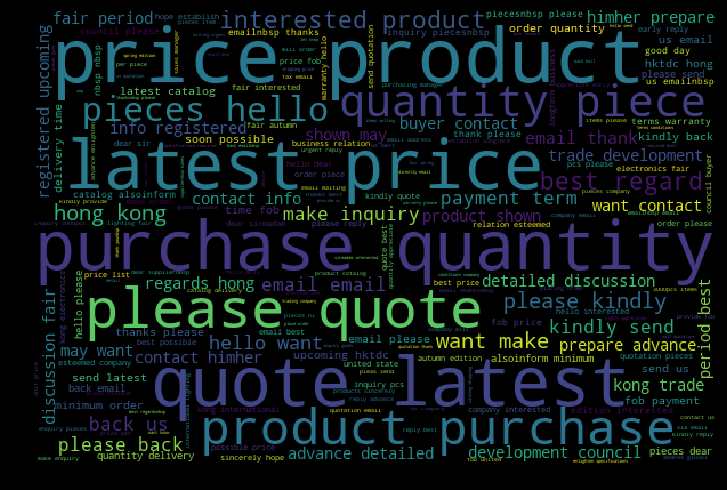

In [842]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Use Naive Bayes Classifer
https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [843]:
X_train

3861     please quote me the latest price of the above product  purchase quantity 4000 pieces  hi  i am wang lee i want to buy your medicial supplies please send me quotation  to my email  thanks  wang lee  EMAIL                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
543      hello sirmadam  i am ms linda patrick of tasdegirmenmakina international tradi

In [844]:
y_test

2416     0
5350     0
6071     0
4162     0
4302     0
1899     0
5307     0
1579     0
7448     0
181      0
6056     0
6481     0
1138     0
5206     0
2571     0
643      0
9486     1
5285     0
3855     0
8788     0
9460     1
6826     0
5005     0
8977     0
8186     0
209      0
1911     0
8936     0
4259     0
6144     0
        ..
2539     0
8286     0
222      0
4716     0
9711     1
366      0
9953     1
6763     0
10006    1
1431     0
9276     1
7863     0
7788     0
4823     0
2893     0
604      0
7134     0
1160     0
830      0
4115     0
7106     0
10326    1
1475     0
4782     0
997      0
6391     0
6289     0
1906     0
7299     0
6760     0
Name: spam, Length: 2112, dtype: int64

In [845]:
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [846]:
prediction["Multinomial"] = model.predict(X_test_df)

In [847]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [848]:
accuracy_score(y_test,prediction["Multinomial"])

0.8702651515151515

Use Logistic Regression

In [849]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [850]:
prediction["Logistic"] = model.predict(X_test_df)

In [851]:
accuracy_score(y_test,prediction["Logistic"])

0.9303977272727273

Use KNN

In [852]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [853]:
prediction["knn"] = model.predict(X_test_df)

In [854]:
accuracy_score(y_test,prediction["knn"])

0.9176136363636364

Using Ensemble

In [855]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_df,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [856]:
prediction["random_forest"] = model.predict(X_test_df)

In [857]:
accuracy_score(y_test,prediction["random_forest"])

0.9275568181818182

Using Adaptive Boost Classifer

In [858]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_df,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [859]:
prediction["adaboost"] = model.predict(X_test_df)

In [860]:
accuracy_score(y_test,prediction["adaboost"])

0.9029356060606061

Tuning k-NN using GridSearchCV


to find number of group has the best result

In [861]:
from sklearn.model_selection import GridSearchCV

In [862]:
k_range = np.arange(1,30)

In [863]:
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [864]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}


In [865]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_df,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [866]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [867]:
grid.best_params_

{'n_neighbors': 2}

In [868]:
grid.best_score_

0.9178503787878788

In [869]:
grid.grid_scores_

C:\Users\sholng\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91205, std: 0.00313, params: {'n_neighbors': 1},
 mean: 0.91785, std: 0.00622, params: {'n_neighbors': 2},
 mean: 0.91205, std: 0.00146, params: {'n_neighbors': 3},
 mean: 0.91288, std: 0.00392, params: {'n_neighbors': 4},
 mean: 0.90613, std: 0.00499, params: {'n_neighbors': 5},
 mean: 0.90447, std: 0.00237, params: {'n_neighbors': 6},
 mean: 0.90258, std: 0.00444, params: {'n_neighbors': 7},
 mean: 0.90412, std: 0.00406, params: {'n_neighbors': 8},
 mean: 0.90092, std: 0.00479, params: {'n_neighbors': 9},
 mean: 0.90069, std: 0.00444, params: {'n_neighbors': 10},
 mean: 0.89796, std: 0.00536, params: {'n_neighbors': 11},
 mean: 0.89856, std: 0.00652, params: {'n_neighbors': 12},
 mean: 0.89607, std: 0.00469, params: {'n_neighbors': 13},
 mean: 0.89418, std: 0.00392, params: {'n_neighbors': 14},
 mean: 0.89358, std: 0.00529, params: {'n_neighbors': 15},
 mean: 0.89276, std: 0.00433, params: {'n_neighbors': 16},
 mean: 0.89145, std: 0.00319, params: {'n_neighbors': 17},
 mean:

New Models

In [ ]:
cost_mat_test = np.matrix()

In [ ]:
from sklearn.linear_model import LogisticRegression
from costcla.models import CostSensitiveLogisticRegression
from costcla.metrics import savings_score

model = CostSensitiveLogisticRegression()
model.fit(X_train_df,y_train,)

In [705]:
for test in ['Logistic','knn','Multinomial','random_forest','adaboost']:
    print("Classification Report for {}".format(test))
    print(classification_report(y_test, prediction[test], target_names = ["Norm", "Spam"]))
    print("--- "*15)

Classification Report for Logistic
             precision    recall  f1-score   support

       Norm       0.95      0.96      0.96      1818
       Spam       0.76      0.69      0.72       294

avg / total       0.92      0.93      0.92      2112

--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
Classification Report for knn
             precision    recall  f1-score   support

       Norm       0.94      0.97      0.96      1818
       Spam       0.79      0.60      0.68       294

avg / total       0.92      0.92      0.92      2112

--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
Classification Report for Multinomial
             precision    recall  f1-score   support

       Norm       0.95      0.90      0.92      1818
       Spam       0.52      0.68      0.59       294

avg / total       0.89      0.87      0.88      2112

--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
Classification Report for random_forest
             precision    rec

In [706]:
print(classification_report(y_test, prediction['Logistic'], target_names = ["Norm", "Spam"]))

             precision    recall  f1-score   support

       Norm       0.95      0.96      0.96      1818
       Spam       0.76      0.69      0.72       294

avg / total       0.92      0.93      0.92      2112



In [707]:
conf_mat = confusion_matrix(y_test, prediction['Logistic'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5,15,'Predicted label')

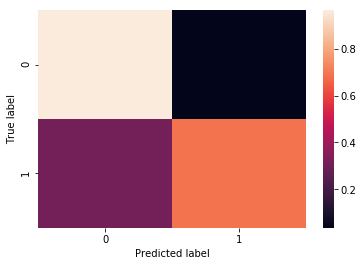

In [708]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [709]:
print(conf_mat)

[[1753   65]
 [  91  203]]


In [710]:
pd.set_option('display.max_colwidth', -1)

### Misclassified as Spam

In [711]:
X_test[y_test < prediction["Logistic"] ]

1911    hello please kindly send me your latest catalog alsoinform me about the minimum order quantity delivery time or fob and payment terms warranty  nbsp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Misclassified as Not-spam

In [712]:
X_test[y_test > prediction["Logistic"] ]

9429     dear sir madam we would like to introduce our selves we are buyers agent in dhaka bangladesh  we supplying fc  fv sc cowgoat crustlining leather cow wet blue butt split leather cow head crust leather  if you need any items of leather so pls feel free contact with us and inform your necessary items with full specification of leather we are looking forward to forming successful business relationships with your valuable company in the near future thanks with best regards managing partner ms jublee tannery skype jubleetannery_bd cell phone  8801819478943 whats apps viberwe chat imo  8801912178055 e ndash mail gt EMAILEMAILface book page WEBSITE i am interested in your product                                                                                                                                                                                                                                                                                                                       

In [1]:
def function():
    pass